In [1]:
from __future__ import print_function

import sys
sys.path.append("/Users/abhishekkadian/Documents/Github/jaa-dl/assignment-1/denoising-autoencoder/")
sys.path.append("/Users/abhishekkadian/Documents/Github/jaa-dl/assignment-1/")

import autoencoder
import convnet

import numpy as np

import torch
from torch.autograd import Variable

import matplotlib.pyplot as plt

from torch import optim

%matplotlib inline

## MLP Testing

In [2]:
trX, teX, trY, teY = convnet.load_mnist(onehot=False)

trX = np.array([x.flatten() for x in trX])
teX = np.array([x.flatten() for x in teX])

In [3]:
trX.shape, teX.shape, trY.shape, teY.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [4]:
trX_V = Variable(torch.from_numpy(trX).float())
teX_V = Variable(torch.from_numpy(teX).float())
trY_V = Variable(torch.from_numpy(trY).long())
teY_V = Variable(torch.from_numpy(teY).long())

In [5]:
mlp = autoencoder.MLP(n_in=784, n_hidden=500, n_out=10)

In [6]:
epochs = 30

for curr_e in range(epochs):
    autoencoder.train_mlp(trX_V, trY_V, mlp, curr_e)
    preds = mlp.forward(teX_V).data.numpy()
    correct = 0.
    for actual, prediction in zip(teY, preds):
        ind = np.argmax(prediction)
        if ind == actual:
            correct += 1
    print("Epoch:", str(curr_e) + ", Accuracy:", correct / teY.shape[0])

Epoch: 0, Loss: -0.168293520808
Epoch: 0, Accuracy: 0.2859
Epoch: 1, Loss: -0.301719635725
Epoch: 1, Accuracy: 0.549
Epoch: 2, Loss: -0.418202966452
Epoch: 2, Accuracy: 0.5627
Epoch: 3, Loss: -0.472356706858
Epoch: 3, Accuracy: 0.5697
Epoch: 4, Loss: -0.497768014669
Epoch: 4, Accuracy: 0.5733
Epoch: 5, Loss: -0.512651145458
Epoch: 5, Accuracy: 0.5755
Epoch: 6, Loss: -0.52312463522
Epoch: 6, Accuracy: 0.5779
Epoch: 7, Loss: -0.550664365292
Epoch: 7, Accuracy: 0.6519
Epoch: 8, Loss: -0.583038151264
Epoch: 8, Accuracy: 0.661
Epoch: 9, Loss: -0.599322974682
Epoch: 9, Accuracy: 0.6643
Epoch: 10, Loss: -0.60928195715
Epoch: 10, Accuracy: 0.6668
Epoch: 11, Loss: -0.616274535656
Epoch: 11, Accuracy: 0.6688
Epoch: 12, Loss: -0.621594786644
Epoch: 12, Accuracy: 0.6698
Epoch: 13, Loss: -0.625852823257
Epoch: 13, Accuracy: 0.6705
Epoch: 14, Loss: -0.629378557205
Epoch: 14, Accuracy: 0.6709
Epoch: 15, Loss: -0.632371366024
Epoch: 15, Accuracy: 0.6717
Epoch: 16, Loss: -0.634960770607
Epoch: 16, Accu

## Autoencoder Testing

In [2]:
def corrupt_input(X):
    noise = torch.FloatTensor(np.random.binomial(1, 0.5, size=X.data.size()))
    return Variable(X.data.clone() * noise)

In [3]:
trX, teX, trY, teY = convnet.load_mnist(onehot=False)

trX = np.array([x.flatten() for x in trX])
teX = np.array([x.flatten() for x in teX])

In [4]:
trX.shape, teX.shape, trY.shape, teY.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [7]:
N = 60000
d_in = 784
d_out = 500
dtype = torch.FloatTensor
batch_size = 64

In [8]:
ae = autoencoder.Autoencoder(n_visible=d_in, n_hidden=d_out, batch_size=batch_size)

In [9]:
optimizer = torch.optim.SGD(ae.parameters(), lr=0.01)
epochs = 1

In [18]:
for e in range(epochs):
    agg_cost = 0.
    num_batches = N / batch_size
    for k in range(num_batches):
        start, end = k * (batch_size), (k + 1) * batch_size
        bX = trX[start:end]
        tilde_x = corrupt_input(bX)
        optimizer.zero_grad()
        Z = ae.forward(tilde_x)
        loss = - torch.sum(bX * torch.log(Z) + (1.0 - bX) * torch.log(1.0 - Z), 1)
        cost = torch.mean(loss)
        cost.backward()
        optimizer.step()
        agg_cost += cost
    agg_cost /= num_batches
    print("epoch:", str(e) + ", cost:", agg_cost.data[0])

epoch: 0, cost: 105.61592865


In [19]:
trX[0].data.size()

torch.Size([784])

In [ ]:
num_batches = N / batch_size

results = []

for k in range(num_batches):
    start, end = k * (batch_size), (k + 1) * batch_size
    bX = trX[start:end]
    tilde_x = corrupt_input(bX)
    z = ae.forward(tilde_x)
    results.append(z)

In [13]:
t = results[0].data[55].numpy()

In [14]:
t = t.reshape(28, 28)

In [15]:
def imshow(img):
    if type(img) == torch.FloatTensor:
        npimg = img.numpy()
    else:
        npimg = img
    plt.imshow(np.transpose(npimg, (1, 2, 0))[:,:,0], 
               cmap='gray')

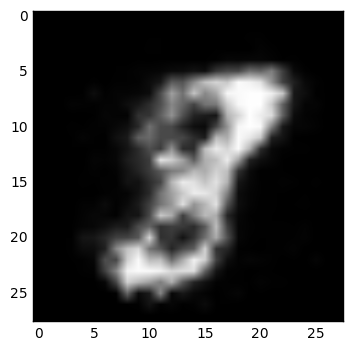

In [16]:
plt.imshow(t, cmap='gray')

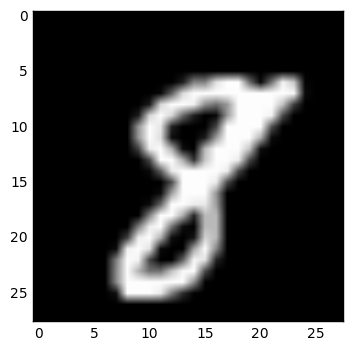

In [17]:
plt.imshow(trX.data[55].numpy().reshape(28, 28), cmap='gray')